In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import spacy
import pandas as pd

In [15]:
# Movie plot text
plot='''
The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth. In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12. Her older sister Katniss volunteers to take her place. Peeta Mellark, a baker's son who once gave Katniss bread when she was starving, is the other District 12 tribute. Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy. He warns them about the "Career" tributes who train intensively at special academies and almost always win. During a TV interview with Caesar Flickerman, Peeta unexpectedly reveals his love for Katniss. She is outraged, believing it to be a ploy to gain audience support, as "sponsors" may provide in-Games gifts of food, medicine, and tools. However, she discovers Peeta meant what he said. The televised Games begin with half of the tributes killed in the first few minutes; Katniss barely survives ignoring Haymitch's advice to run away from the melee over the tempting supplies and weapons strewn in front of a structure called the Cornucopia. Peeta forms an uneasy alliance with the four Careers. They later find Katniss and corner her up a tree. Rue, hiding in a nearby tree, draws her attention to a poisonous tracker jacker nest hanging from a branch. Katniss drops it on her sleeping besiegers. They all scatter, except for Glimmer, who is killed by the insects. Hallucinating due to tracker jacker venom, Katniss is warned to run away by Peeta. Rue cares for Katniss for a couple of days until she recovers. Meanwhile, the alliance has gathered all the supplies into a pile. Katniss has Rue draw them off, then destroys the stockpile by setting off the mines planted around it. Furious, Cato kills the boy assigned to guard it. As Katniss runs from the scene, she hears Rue calling her name. She finds Rue trapped and releases her. Marvel, a tribute from District 1, throws a spear at Katniss, but she dodges the spear, causing it to stab Rue in the stomach instead. Katniss shoots him dead with an arrow. She then comforts the dying Rue with a song. Afterward, she gathers and arranges flowers around Rue's body. When this is televised, it sparks a riot in Rue's District 11. President Snow summons Seneca Crane, the Gamemaker, to express his displeasure at the way the Games are turning out. Since Katniss and Peeta have been presented to the public as "star-crossed lovers", Haymitch is able to convince Crane to make a rule change to avoid inciting further riots. It is announced that tributes from the same district can win as a pair. Upon hearing this, Katniss searches for Peeta and finds him with an infected sword wound in the leg. She portrays herself as deeply in love with him and gains a sponsor's gift of soup. An announcer proclaims a feast, where the thing each survivor needs most will be provided. Peeta begs her not to risk getting him medicine. Katniss promises not to go, but after he falls asleep, she heads to the feast. Clove ambushes her and pins her down. As Clove gloats, Thresh, the other District 11 tribute, kills Clove after overhearing her tormenting Katniss about killing Rue. He spares Katniss "just this time...for Rue". The medicine works, keeping Peeta mobile. Foxface, the girl from District 5, dies from eating nightlock berries she stole from Peeta; neither knew they are highly poisonous. Crane changes the time of day in the arena to late at night and unleashes a pack of hound-like creatures to speed things up. They kill Thresh and force Katniss and Peeta to flee to the roof of the Cornucopia, where they encounter Cato. After a battle, Katniss wounds Cato with an arrow and Peeta hurls him to the creatures below. Katniss shoots Cato to spare him a prolonged death. With Peeta and Katniss apparently victorious, the rule change allowing two winners is suddenly revoked. Peeta tells Katniss to shoot him. Instead, she gives him half of the nightlock. However, before they can commit suicide, they are hastily proclaimed the victors of the 74th Hunger Games. Haymitch warns Katniss that she has made powerful enemies after her display of defiance. She and Peeta return to District 12, while Crane is locked in a room with a bowl of nightlock berries, and President Snow considers the situation.
'''

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the movie plot text with spaCy
doc1 = nlp(plot)

#load character metadata dataframe
ind={0:"Wikipedia movie ID", 1:"Freebase movie ID", 2:"Movie release date", 3:"Character name", 4:"Actor date of birth", 5:"Actor gender", 6:"Actor height", 7:"Actor ethnicity", 8:"Actor name", 9:"Actor age at movie release", 10:"Freebase character/actor map ID", 11:"Freebase character ID", 12:"Freebase actor ID"}
characters_df= pd.read_csv("Data\character.metadata.tsv", delimiter="\t", header=None)
characters_df=characters_df.rename(columns=ind)

#filter for our movie
movie_ID=31186339
charSex=characters_df[characters_df["Wikipedia movie ID"] == movie_ID][["Character name","Actor gender"]]
charSex=charSex.set_index("Character name")

In [21]:
# function that given a personn and sentences returns the sentences where the person is cited
def get_sentences_with_person(person, doc):
    sentences = []
    for sent in doc.sents:
        if person in sent.text:
            sentences.append(sent.text)
    return sentences

#function that returns a list of unique characters
def get_characters(doc):
    characters = []
    for ent in doc.ents:
        if ent.label_ == "PERSON" and ent.text.istitle():
            characters.append(ent.text)
    return list(set(characters))

def clean_character_list(character_list, doc):
    deleted_chars = []
    for i, character in enumerate(character_list):
        for chars2 in character_list[i+1:]:
            if character in chars2 or chars2 in character:
                if len(get_sentences_with_person(character, doc)) > len(get_sentences_with_person(chars2,doc)):
                    deleted_chars.append(chars2)
                else:
                    deleted_chars.append(character)
    return list(set(character_list) - set(deleted_chars))

characters = clean_character_list(get_characters(doc1), doc1)
for ent in characters:
    print(ent, get_sentences_with_person(ent, doc1))

Snow ['President Snow summons Seneca Crane, the Gamemaker, to express his displeasure at the way the Games are turning out.', 'She and Peeta return to District 12, while Crane is locked in a room with a bowl of nightlock berries, and President Snow considers the situation.\n']
Clove ['Clove ambushes her and pins her down.', 'As Clove gloats, Thresh, the other District 11 tribute, kills Clove after overhearing her tormenting Katniss about killing Rue.']
Haymitch ['Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy.', "The televised Games begin with half of the tributes killed in the first few minutes; Katniss barely survives ignoring Haymitch's advice to run away from the melee over the tempting supplies and weapons strewn in front of a structure called the Cornucopia.", 'Since Katniss and Peeta have been presented to the public as "star-crossed lovers", Haymitch is able to convince Crane to make a rule change to avoi

In [56]:
from spacy.tokens import Token
Token.set_extension("ref", default=None, force=True)

def replace_pronouns(doc, charSex, characters):
    heStack = []
    sheStack = []
    theyStack = []
    neutralStack = []
    for sentence in doc.sents:
        for token in sentence:
            #detect personns and add them to the correct stack
            if token.text in characters :
                if token.nbor(1).pos_=="CCONJ":
                    if token.nbor(2).pos_ == "PROPN":
                        theyStack.append([token.text, token.nbor(2).text])
                        neutralStack.append([token.text, token.nbor(2).text])
                    elif token.nbor(3).pos_ == "PROPN":
                        theyStack.append([token.text, token.nbor(3).text])
                        neutralStack.append([token.text, token.nbor(3).text])
                elif any(charSex.index.str.contains(token.text)):
                    sex=charSex.loc[charSex.index.str.contains(token.text)]["Actor gender"].values[0]
                    if sex=="F":
                        sheStack.append(token.text)
                        neutralStack.append(token.text)
                    elif sex=="M":
                        heStack.append(token.text)
                        neutralStack.append(token.text)
                    else:
                        neutralStack.append(token.text)
            #replace pronouns
            if token.pos_ == "PRON":
                if token.text.lower() in ["he", "him", "his"] and (len(heStack) > 0):
                    token._.set("ref", [heStack[-1]])
                elif token.text.lower() in ["she", "her", "hers"] and (len(sheStack) > 0):
                    token._.set("ref", [sheStack[-1]])
                elif token.text.lower() in ["they", "them", "their", "theirs"] and (len(theyStack) > 0):
                    token._.set("ref", theyStack[-1])
                elif token.text.lower() in ["who"] and (len(neutralStack) > 0):
                    token._.set("ref", [neutralStack[-1]])
    return doc

doc=replace_pronouns(doc1, charSex, characters)

In [57]:
for token in doc:
    if token._.ref:
        print(token._.ref)

['Peeta']
['Katniss']
['Haymitch']
['Katniss', 'Peeta']
['Haymitch']
['Katniss']
['Katniss']
['Peeta']
['Katniss', 'Peeta']
['Katniss']
['Katniss', 'Peeta']
['Glimmer']
['Katniss']
['Katniss', 'Peeta']
['Katniss']
['Rue']
['Rue']
['Katniss']
['Peeta']
['Katniss']
['Rue']
['Haymitch']
['Katniss']
['Haymitch']
['Katniss']
['Peeta']
['Peeta']
['Katniss']
['Clove']
['Clove']
['Peeta']
['Rue']
['Katniss', 'Peeta']
['Katniss', 'Peeta']
['Katniss', 'Peeta']
['Peeta']
['Peeta']
['Peeta']
['Katniss']
['Peeta']
['Peeta', 'Katniss']
['Peeta', 'Katniss']
['Katniss']
['Katniss']


In [53]:
from spacy import displacy
displacy.render(doc, style="dep")

In [62]:
#make a function that takes in a sentence and returns every subject, verb, and object if present
def get_subject_object(doc):
    interactions=[]
    for token in doc:
        if token.pos_=="VERB":
            subj=[child for child in token.children if child.dep_ == "nsubj" or child.dep_ == "nsubjpass"]
            subj=subj[0] if subj else None
            obj=[child for child in token.children if child.dep_ == "dobj" or child.dep_ == "pobj"]
            obj=obj[0] if obj else None
            if subj and obj:
                if subj.text in characters and obj.text in characters:
                    interactions.append([subj.text, token.lemma_, obj.text])
                elif subj._.ref:
                    for elem in subj._.ref:
                        if obj._.ref:
                            for elem2 in obj._.ref:
                                interactions.append([elem, token.lemma_, elem2])
                        else:
                            interactions.append([elem, token.lemma_, obj.text])
                elif obj._.ref:
                    for elem in obj._.ref:
                        interactions.append([subj.text, token.lemma_, elem])
    return interactions

interactions = get_subject_object(doc)
interactions

[['Peeta', 'give', 'bread'],
 ['Haymitch', 'warn', 'Katniss'],
 ['Haymitch', 'warn', 'Peeta'],
 ['Peeta', 'say', 'what'],
 ['Katniss', 'find', 'Katniss'],
 ['Peeta', 'find', 'Katniss'],
 ['Katniss', 'draw', 'Katniss'],
 ['Katniss', 'draw', 'Peeta'],
 ['Katniss', 'dodge', 'spear'],
 ['Katniss', 'comfort', 'Rue'],
 ['Katniss', 'portray', 'herself'],
 ['Peeta', 'beg', 'Katniss'],
 ['Clove', 'ambush', 'Clove'],
 ['Peeta', 'spare', 'Katniss'],
 ['Katniss', 'kill', 'Thresh'],
 ['Peeta', 'kill', 'Thresh'],
 ['Katniss', 'encounter', 'Cato'],
 ['Peeta', 'encounter', 'Cato'],
 ['Peeta', 'tell', 'Katniss'],
 ['Katniss', 'give', 'half'],
 ['Peeta', 'commit', 'suicide'],
 ['Katniss', 'commit', 'suicide'],
 ['Peeta', 'proclaim', 'victors'],
 ['Katniss', 'proclaim', 'victors'],
 ['Haymitch', 'warn', 'Katniss'],
 ['Katniss', 'make', 'enemies']]

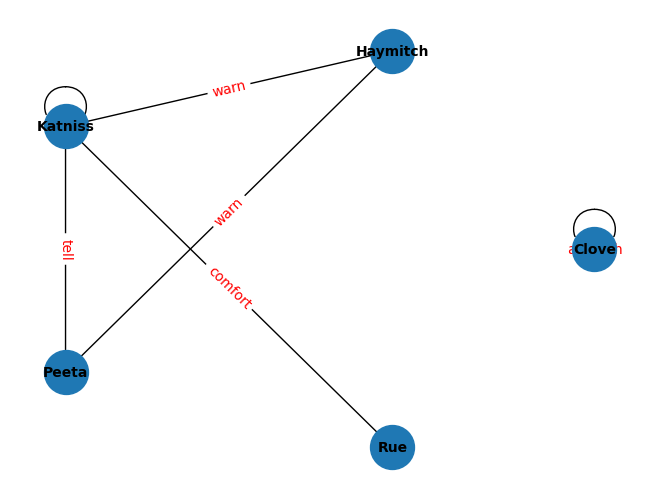

In [63]:
#make a graph
G = nx.Graph()

for char in characters:
    G.add_node(char)

for interaction in interactions:
    if interaction[0] in characters and interaction[2] in characters:
        G.add_edge(interaction[0], interaction[2], label=interaction[1])

#draw the graph
isolated_nodes = [node for node in G.nodes() if G.degree(node) == 0]
G.remove_nodes_from(isolated_nodes)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True, node_size=1000, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()
